In [133]:
import pip
import os
import pandas as pd
import matplotlib.pyplot as plt

In [134]:
cd C:\Users\theja\Desktop\main.PC\MoState\S4Fall\Data Mining 535\Project

C:\Users\theja\Desktop\main.PC\MoState\S4Fall\Data Mining 535\Project


In [135]:
os.system('pip install yfinance')
os.system('pip install plotly')
import yfinance as yf

In [136]:
import datetime
current = date.today()
one_week = current - datetime.timedelta(days=7)
two_week = one_week - datetime.timedelta(days=7)
three_week = two_week - datetime.timedelta(days=7)
four_week = three_week - datetime.timedelta(days=7)

In [137]:
df = pd.DataFrame()
vals_w1 = []
vals_w2 = []
vals_w3 = []
vals_w4 = []
avg_vals = []
stock_list = {
    'Microsoft': 'MSFT', 
    'Amazon': 'AMZN', 
    'Tesla': 'TSLA',
    'Netflix': 'NFLX',
    'Snap': 'SNAP',
    'Bank of America': 'BAC',
    'JPMorgan Chase': 'JPM',
    'Mastercard': 'MA',
    'American Express': 'AXP',
    'Capital One': 'COF',
    'Nestle': 'NSRGY',
    'PepsiCo': 'PEP',
    'Uilever': 'UL',
    'Monster': 'MNST',
    'Hershey': 'HSY',
    'Abbott': 'ABT',
    'ResMed': 'RMD',
    'Penn': 'PENN',
    'ABIOMED': 'ABMD',
    'Pfizer': 'PFE',
}
tickers = list(stock_list.values())
company = list(stock_list.keys())

 

In [138]:
#determine average price each weel
#determine open - close average for each week for one month
for name in tickers:
    df = yf.download(tickers=name, period='5d', interval='1h',start=one_week,end=current)
    op = df['Open'].mean()
    cl = df['Close'].mean()
    avg_wk1 = (op + cl) / 2
    vals_w1.append(op - cl)
    df = yf.download(tickers=name, period='5d', interval='1h',start=two_week,end=one_week)
    op = df['Open'].mean()
    cl = df['Close'].mean()
    avg_wk2 = (op + cl) / 2
    vals_w2.append(op - cl)
    df = yf.download(tickers=name, period='5d', interval='1h',start=three_week,end=two_week)
    op = df['Open'].mean()
    cl = df['Close'].mean()
    avg_wk3 = (op + cl) / 2
    vals_w3.append(op - cl)
    df = yf.download(tickers=name, period='5d', interval='1h',start=four_week,end=three_week)
    op = df['Open'].mean()
    cl = df['Close'].mean()
    avg_wk4 = (op + cl) / 2
    vals_w4.append(op - cl)
    avg_vals.append((avg_wk1+avg_wk2+avg_wk3+avg_wk4)/4)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [139]:
#Calulate the total of the mean open/closes
#Calculate the total of all the average prices
totals = []
avg_total = 0

for i in range(0,20):
    totals.append(vals_w1[i] + vals_w2[i] + vals_w3[i] + vals_w4[i])
    avg_total += avg_vals[i]
    
df = pd.DataFrame({'Stock': tickers, 'Mean Week Total': totals, 'Average Value' : avg_vals})
    
print(df)

    Stock  Mean Week Total  Average Value
0    MSFT         0.492642     334.952677
1    AMZN        11.817408    3541.903104
2    TSLA         0.974109    1084.440961
3    NFLX         3.180068     655.618606
4    SNAP         0.191865      50.800097
5     BAC         0.130339      46.064376
6     JPM         0.379297     163.687115
7      MA         0.315931     337.381517
8     AXP         0.687470     168.790638
9     COF         0.445806     150.861983
10  NSRGY         0.162554     131.375491
11    PEP         0.101010     163.557865
12     UL         0.084795      52.008196
13   MNST         0.273651      88.533922
14    HSY         0.042714     179.315482
15    ABT         0.050658     128.061002
16    RMD         0.611297     258.636805
17   PENN         0.139145      53.077402
18   ABMD         2.338164     333.255334
19    PFE        -0.018894      51.715287


In [140]:
#algorithm for determining value of change
pct_of_total = []
calculated_mean = []
for i in range(0,20):
    pct_of_total.append(avg_vals[i] / avg_total)
    calculated_mean.append(totals[i] / pct_of_total[i])
    
df.insert(len(df.columns),'Mean Change', calculated_mean)
print(df)

    Stock  Mean Week Total  Average Value  Mean Change
0    MSFT         0.492642     334.952677    11.728053
1    AMZN        11.817408    3541.903104    26.605036
2    TSLA         0.974109    1084.440961     7.162749
3    NFLX         3.180068     655.618606    38.677944
4    SNAP         0.191865      50.800097    30.116867
5     BAC         0.130339      46.064376    22.562500
6     JPM         0.379297     163.687115    18.477511
7      MA         0.315931     337.381517     7.467042
8     AXP         0.687470     168.790638    32.477566
9     COF         0.445806     150.861983    23.563745
10  NSRGY         0.162554     131.375491     9.866464
11    PEP         0.101010     163.557865     4.924614
12     UL         0.084795      52.008196    13.001038
13   MNST         0.273651      88.533922    24.647057
14    HSY         0.042714     179.315482     1.899450
15    ABT         0.050658     128.061002     3.154361
16    RMD         0.611297     258.636805    18.846918
17   PENN 

In [141]:
#assign buy, hold, or sell value to each stock
#based on value of change
bsh = []
colors = []
for i in range(0,20):
    if (calculated_mean[i] > 10):
        bsh.append('Buy')
        colors.append('g')
    if ((calculated_mean[i] < 10) & (calculated_mean[i] > 0)):
        bsh.append("Hold")
        colors.append('y')
    if (calculated_mean[i] < 0):
        bsh.append("Sell")
        colors.append('b')
        
df.insert(len(df.columns), 'Buy Hold or Sell', bsh)
print(df)

    Stock  Mean Week Total  Average Value  Mean Change Buy Hold or Sell
0    MSFT         0.492642     334.952677    11.728053              Buy
1    AMZN        11.817408    3541.903104    26.605036              Buy
2    TSLA         0.974109    1084.440961     7.162749             Hold
3    NFLX         3.180068     655.618606    38.677944              Buy
4    SNAP         0.191865      50.800097    30.116867              Buy
5     BAC         0.130339      46.064376    22.562500              Buy
6     JPM         0.379297     163.687115    18.477511              Buy
7      MA         0.315931     337.381517     7.467042             Hold
8     AXP         0.687470     168.790638    32.477566              Buy
9     COF         0.445806     150.861983    23.563745              Buy
10  NSRGY         0.162554     131.375491     9.866464             Hold
11    PEP         0.101010     163.557865     4.924614             Hold
12     UL         0.084795      52.008196    13.001038          

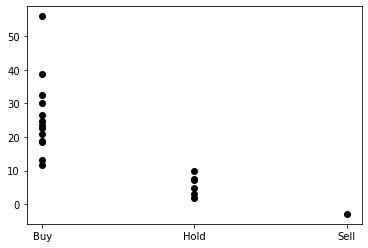

In [142]:
#Show values of change on scatterplot graph
plt.scatter(df['Buy Hold or Sell'], 
                df['Mean Change'],
                color = 'black')

In [143]:
#Save final dataframe to a CSV file
df.to_csv('Final Classification.csv')